# **INTA6450 Final Project**

In [1]:
import pandas as pd
import numpy as np
import json

# Data Engineering

### JSON File Structure
Extract Title of App, and ['assessment']['report']

In [2]:
import os
from os.path import isfile, join

In [ ]:
## Taken from https://stackoverflow.com/questions/58442723/how-to-flatten-a-nested-json-recursively-with-flatten-json
def flatten_json(nested_json: dict, exclude: list=[''], sep: str='_') -> dict:
    """
    Flatten a list of nested dicts.
    """
    out = dict()
    def flatten(x: (list, dict, str), name: str='', exclude=exclude):
        if type(x) is dict:
            for a in x:
                if a not in exclude:
                    flatten(x[a], f'{name}{a}{sep}')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, f'{name}{i}{sep}')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(nested_json)
    return out

In [67]:
## Reading All Data
data_df = pd.DataFrame()
for filename in os.listdir('data'):
    fullname = join('data', filename)
    with open(fullname) as f:
        try:
            temp = json.loads(f.read())
            
            for d in temp:
                if d['assessment'] is None:
                    continue
                title = {
                    'title': d['title']
                }
                data = {
                    'report': d['assessment']['report']
                }
                title.update(data)
                temp_df = pd.DataFrame.from_dict(flatten_json(title), orient = 'index').T
                data_df = pd.concat([data_df, temp_df])
        except:
            print(filename)

.DS_Store


In [90]:
columns = list(data_df.columns)
act_columns = list()
for c in columns:
    if 'description' not in c:
        act_columns.append(c)

act_df = data_df[act_columns]
# act_df = act_df.set_index('title')
temp_df = act_df.iloc[0: 5]
temp_df.head()

,title,report_score,report_findings_0_cvss,report_findings_0_impactType,report_findings_0_affected,report_findings_0_checkId,report_findings_1_cvss,report_findings_1_impactType,report_findings_1_affected,report_findings_1_checkId,...,report_findings_147_affected,report_findings_147_checkId,report_findings_148_cvss,report_findings_148_impactType,report_findings_148_affected,report_findings_148_checkId,report_findings_149_cvss,report_findings_149_impactType,report_findings_149_affected,report_findings_149_checkId
0,CloudMall - 50% OFF Amazon Prices,44.6,7.7,high,True,sensitive_data_cert_validation,7,high,True,certificate_validation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Bid Whist Plus,52.8,6.1,medium,True,apk_leaked_data_sdcard,5.9,medium,True,keysize_check,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,PGA TOUR Golf Shootout,None,4.6,medium,True,allow_backup_check,4,medium,True,obfuscation_check,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Baby Shark TV: Songs & Stories,24.9,8.1,high,True,sensitive_data_http_gpslatitude,7.5,high,True,android_target_sdk_min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Ice Princess Mom and Baby Game,84.8,4.6,medium,True,allow_backup_check,2.1,low,True,leaked_logcat_data_build_fingerprint,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Some json tests actually have 
num_findings = 150 # From Initial Reading of the json
final_df = pd.DataFrame() # Append to this DataFrame for final data
for t in act_df.title.unique():
    temp_df = act_df.loc[act_df.title == t]
    curr_df = temp_df[['title', 'report_score']]
    for i in range(num_findings): # Making Each Test CVSS result its own column as a feature
        test_name = temp_df[f'report_findings_{i}_checkId'].values[0]
        test_result = temp_df[f'report_findings_{i}_cvss'].values[0]
        
        if test_result is np.nan: 
            continue
        # Making it into a dataframe
        test_result_dict = {
            test_name: [test_result]
        }

        test_result_df = pd.DataFrame(test_result_dict)
        curr_df = pd.concat([curr_df, test_result_df], axis = 1)
    # Appending to DataFrame
    final_df = pd.concat([final_df, curr_df])
    # break

final_df.head()

,title,report_score,sensitive_data_cert_validation,certificate_validation,world_writable_files_check,world_readable_files_check,apk_weak_crypto_methods,apk_weak_crypto_hashing_algorithms,leaked_logcat_data_gpslatitude,apk_textfield_autocorrect,...,leaked_memdump_data_surrounding_wifi_network_ssid,leaked_memdump_data_username,leaked_memdump_data_wifi_ip,leaked_memdump_data_wifi_mac,leaked_memdump_data_zipcode,uipasteboard_expiry,background_modes,afnetworking_detected,afnetworking,uipasteboard_handoff
0,CloudMall - 50% OFF Amazon Prices,44.6,7.7,7.0,5.0,4.7,3.7,3.7,3.3,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Bid Whist Plus,52.8,0.0,NaN,5.0,4.7,3.7,3.7,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,PGA TOUR Golf Shootout,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Baby Shark TV: Songs & Stories,24.9,0.0,0.0,5.0,4.7,3.7,3.7,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Ice Princess Mom and Baby Game,84.8,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# Remove Apps that don't have a report score
final_df = final_df.dropna(subset = ['report_score'])
# Finding Most Common Tests
count_na_tests = list()
tests = list(final_df.columns)[2:]
count = 0
for t in tests:
    count_na = final_df[t].isna().sum()
    count_na_tests.append([t, count_na])
    if count_na <= 4:
        count += 1

print(f'Num Tests less than 4 NA = {count}')
# Create DataFrame of NA distribution to see which tests to get rid of
count_na_tests.sort(key = lambda x: x[1])
count_na_tests_dict = dict()
for x in count_na_tests:
    count_na_tests_dict[x[0]] = [x[1]]
count_na_tests_df = pd.DataFrame(count_na_tests_dict).T
count_na_tests_df.describe()

Num Tests less than 4 NA = 119


,0
count,275.000000
mean,24.192727
std,18.398547
min,0.000000
25%,4.000000
50%,37.000000
75%,41.000000
max,44.000000


#### Looking at most common tests is the first step in our feature analysis

In [122]:
# From Code above, 25 percentile is where best since most tests only have less than or equal to 4 NA values
# The tests we use then become the most common Tests run against the apps
tests = list()
for t in count_na_tests:
    if t[1] <= 4:
        tests.append(t[0])
final_cols = ['title', 'report_score']
final_cols.extend(tests)
modelling_df = final_df[final_cols]
modelling_df = modelling_df.fillna(0)
modelling_df.head()

,title,report_score,api_resource_misconfiguration,cookie_without_httponly_flag,cookie_without_secure_flag,api_authentication,api_excessive_data_exposure,zip_file_in_transit_check_broken_ssl,uses_http,url_listing,...,obfuscation_check,master_key_check,allow_backup_check,decompile_apk_check,keysize_check,get_native_methods,okhttp,android_target_sdk_min,certificate_validity_check,secure_random_check
0,CloudMall - 50% OFF Amazon Prices,44.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Bid Whist Plus,52.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.6,0.0,5.9,0.0,0.0,0.0,0.0,0.0
0,Baby Shark TV: Songs & Stories,24.9,0.0,0.0,0.0,0.0,0.0,0.0,6.5,0.0,...,0.0,0.0,0.0,0.0,5.9,0.0,0.0,7.5,0.0,2.7
0,Ice Princess Mom and Baby Game,84.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Speak & Translate - Translator,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelling and Analysis

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [126]:
feats = list(modelling_df.columns)[2:]
pred_var = list(modelling_df.columns)[1]

X = modelling_df[feats]
y = modelling_df[pred_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [128]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print(f'Training RMSE = {mean_squared_error(y_train, y_pred_train) ** 0.5}')
print(f'Testing RMSE = {mean_squared_error(y_test, y_pred_test) ** 0.5}')

Training RMSE = 6.05778307836084
Testing RMSE = 15.674982448656205


In [138]:
# Analysizng Feature Importance By looking at the Output from the Random Forest Regressor
feat_imp = list()
num_feats = 20
for i, f in enumerate(rf.feature_importances_):
    feat_imp.append([feats[i], f])
feat_imp.sort(key = lambda x: x[1], reverse = True)
fe = list()
val = list()
for i, f in enumerate(feat_imp):
    if i == 20:
        break
    fe.append(f[0])
    val.append(f[1])
feat_imp_df = pd.Series(val, index = fe)

Text(0.5, 1.0, 'Feature Importance from Random Forest')

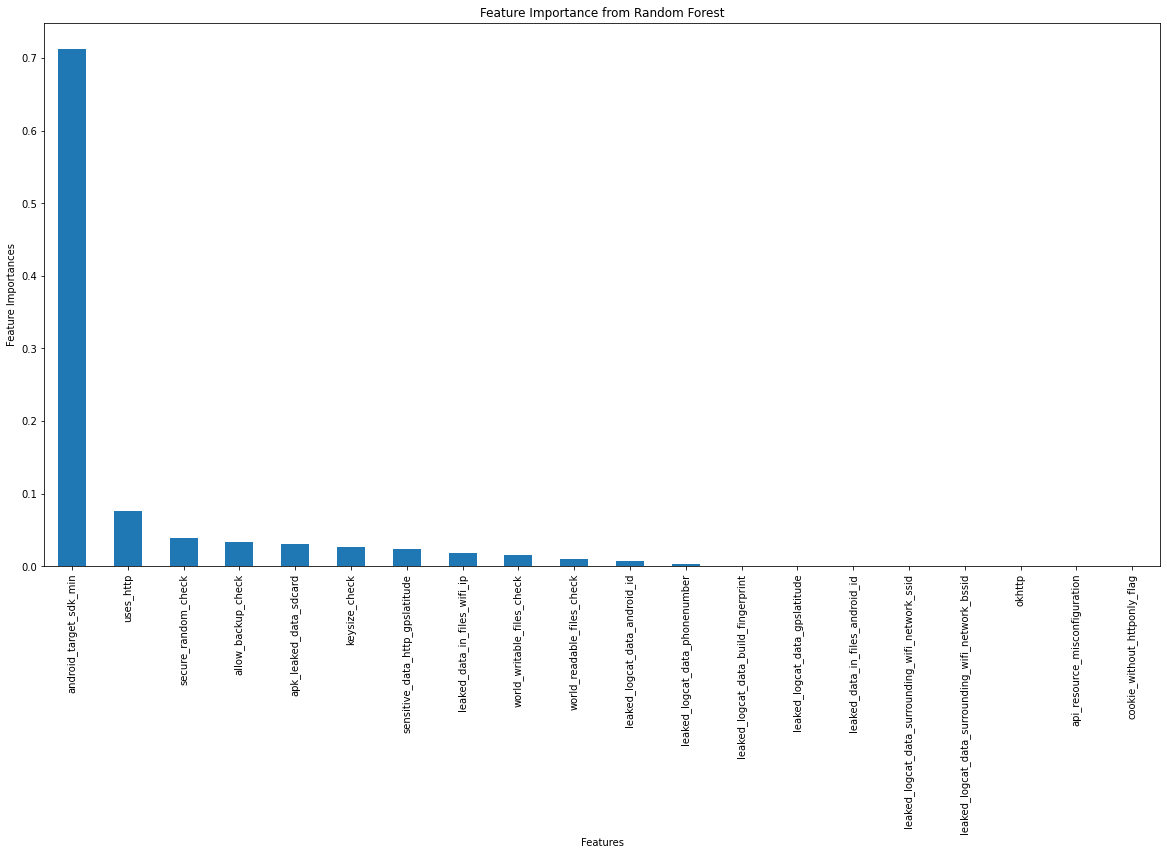

In [141]:
plt.rcParams["figure.figsize"] = (20,10)

feat_imp_df.plot.bar()
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Feature Importance from Random Forest')